In [3]:
# Extract the folders from Zipped file
!unzip "/Users/apple/Documents/Projects/image/Dataset.zip"

Archive:  /Users/apple/Documents/Projects/image/Dataset.zip
   creating: images.cv_jzk6llhf18tm3k0kyttxz/
   creating: images.cv_jzk6llhf18tm3k0kyttxz/data/
  inflating: images.cv_jzk6llhf18tm3k0kyttxz/readme.txt  
   creating: images.cv_jzk6llhf18tm3k0kyttxz/data/test/
   creating: images.cv_jzk6llhf18tm3k0kyttxz/data/train/
   creating: images.cv_jzk6llhf18tm3k0kyttxz/data/val/
   creating: images.cv_jzk6llhf18tm3k0kyttxz/data/test/animal fish/
   creating: images.cv_jzk6llhf18tm3k0kyttxz/data/test/animal fish bass/
   creating: images.cv_jzk6llhf18tm3k0kyttxz/data/test/fish sea_food black_sea_sprat/
   creating: images.cv_jzk6llhf18tm3k0kyttxz/data/test/fish sea_food gilt_head_bream/
   creating: images.cv_jzk6llhf18tm3k0kyttxz/data/test/fish sea_food hourse_mackerel/
   creating: images.cv_jzk6llhf18tm3k0kyttxz/data/test/fish sea_food red_mullet/
   creating: images.cv_jzk6llhf18tm3k0kyttxz/data/test/fish sea_food red_sea_bream/
   creating: images.cv_jzk6llhf18tm3k0kyttxz/data/tes

In [4]:
# Read dataset
val_data = "/Users/apple/Documents/Projects/image/dataset/data/val"
train_data = "/Users/apple/Documents/Projects/image/dataset/data/train"
test_data = "/Users/apple/Documents/Projects/image/dataset/data/test"

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# -------------------- Parameters --------------------
IMG_SIZE = (128, 128)   # ⚡ smaller images → much faster than (224,224)
BATCH_SIZE = 16         # ⚡ smaller batch size to reduce memory load

# -------------------- Validation data generator --------------------
val_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale
val_generator = val_datagen.flow_from_directory(
    val_data,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# -------------------- Test data generator --------------------
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale
test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# -------------------- Training data generator with augmentation --------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values to [0,1]
    rotation_range=20,        # ⚡ less aggressive augmentation = faster
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=IMG_SIZE,     # ⚡ reduced size
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


2025-09-29 11:11:26.366597: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/apple/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.
Found 6225 images belonging to 11 classes.


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Resize for validation
val_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale
val_generator = val_datagen.flow_from_directory(
    val_data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Resize for test data
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale
test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Apply augumentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0,1]
    rotation_range=40,  # Random rotation
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,  # Shear transformation
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True  # Flip images
)
train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(224, 224),  # Resize all images
    batch_size=32,
    class_mode='categorical'
)

Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.
Found 6225 images belonging to 11 classes.


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()


/Users/apple/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,626,442 (6.20 MB)

 Trainable params: 1,626,442 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

# -------------------- Paths --------------------
save_path = "/Users/apple/Documents/Projects/image/dataset/data"
train_dir = f"{save_path}/train"
val_dir   = f"{save_path}/val"
test_dir  = f"{save_path}/test"

# -------------------- Parameters --------------------
IMG_SIZE = (128, 128)   # ⚡ smaller images → much faster
BATCH_SIZE = 16         # ⚡ smaller batch size for CPU

# -------------------- Data Generators --------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

# Load the pre-trained VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
base_model.trainable = False  # Freeze convolutional layers

x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dense(train_generator.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=x)

# -------------------- Compile --------------------
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# -------------------- Train --------------------
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=3)

# -------------------- Save Model --------------------
model.save(f"{save_path}/vgg16_trained_model.h5")
print(f"Model saved successfully at {save_path}/vgg16_trained_model.h5")

# Save training history
with open(f"{save_path}/training_history_vgg16.pkl", "wb") as f:
    pickle.dump(history.history, f)
print(f"Training history saved successfully at {save_path}/training_history_vgg16.pkl")

# -------------------- Evaluate --------------------
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")


2025-09-29 11:32:10.370976: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/apple/Documents/Projects/image/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.


/Users/apple/Documents/Projects/image/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
390/390 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6472 - loss: 1.1166

/Users/apple/Documents/Projects/image/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


390/390 ━━━━━━━━━━━━━━━━━━━━ 1131s 3s/step - accuracy: 0.6475 - loss: 1.1155 - val_accuracy: 0.8681 - val_loss: 0.3530
Epoch 2/3
390/390 ━━━━━━━━━━━━━━━━━━━━ 1173s 3s/step - accuracy: 0.8831 - loss: 0.3258 - val_accuracy: 0.8910 - val_loss: 0.2643
Epoch 3/3
390/390 ━━━━━━━━━━━━━━━━━━━━ 1124s 3s/step - accuracy: 0.9275 - loss: 0.2035 - val_accuracy: 0.9396 - val_loss: 0.1792


Model saved successfully at /Users/apple/Documents/Projects/image/dataset/data/vgg16_trained_model.h5
Training history saved successfully at /Users/apple/Documents/Projects/image/dataset/data/training_history_vgg16.pkl
200/200 ━━━━━━━━━━━━━━━━━━━━ 488s 2s/step - accuracy: 0.9467 - loss: 0.1420
Test accuracy: 0.9451


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

# -------------------- Paths --------------------
save_path = "/Users/apple/Documents/Projects/image/dataset/data"
train_dir = f"{save_path}/train"
val_dir   = f"{save_path}/val"
test_dir  = f"{save_path}/test"

# -------------------- Parameters --------------------
IMG_SIZE = (128, 128)   # ⚡ Smaller images → faster on Colab/Mac
BATCH_SIZE = 16
EPOCHS = 3

# -------------------- Data Generators --------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

# -------------------- Model --------------------
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
base_model.trainable = False  # Freeze base layers

x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dense(train_generator.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=x)

# -------------------- Compile --------------------
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# -------------------- Train --------------------
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

# -------------------- Save Model --------------------
model.save(f"{save_path}/resnet50_trained_model.h5")
print(f"Model saved successfully at {save_path}/resnet50_trained_model.h5")

# -------------------- Save Training History --------------------
with open(f"{save_path}/training_history_resnet50.pkl", "wb") as f:
    pickle.dump(history.history, f)
print(f"Training history saved successfully at {save_path}/training_history_resnet50.pkl")

# -------------------- Evaluate --------------------
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 77s 1us/step
Epoch 1/3
390/390 ━━━━━━━━━━━━━━━━━━━━ 450s 1s/step - accuracy: 0.2018 - loss: 2.3227 - val_accuracy: 0.2802 - val_loss: 1.9159
Epoch 2/3
390/390 ━━━━━━━━━━━━━━━━━━━━ 612s 2s/step - accuracy: 0.3119 - loss: 1.9602 - val_accuracy: 0.4038 - val_loss: 1.7083
Epoch 3/3
390/390 ━━━━━━━━━━━━━━━━━━━━ 661s 2s/step - accuracy: 0.3669 - loss: 1.7692 - val_accuracy: 0.4103 - val_loss: 1.6360


Model saved successfully at /Users/apple/Documents/Projects/fish image classification/images.cv_jzk6llhf18tm3k0kyttxz/data/resnet50_trained_model.h5
Training history saved successfully at /Users/apple/Documents/Projects/fish image classification/images.cv_jzk6llhf18tm3k0kyttxz/data/training_history_resnet50.pkl
200/200 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.4331 - loss: 1.6186
Test accuracy: 0.4289


In [ ]:
import tensorflow as tf
import pickle

# Define save path
save_path = "/Users/apple/Documents/Projects/image/dataset/data"

# Load the trained model
model = tf.keras.models.load_model(f"{save_path}/resnet50_trained_model.h5")
print("Model loaded successfully!")

# Load training history
with open(f"{save_path}/training_history_resnet50.pkl", "rb") as f:
    history = pickle.load(f)
print("Training history loaded successfully!")

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")


Model loaded successfully!
Training history loaded successfully!
200/200 ━━━━━━━━━━━━━━━━━━━━ 237s 1s/step - accuracy: 0.4253 - loss: 1.6316
Test accuracy: 0.4289


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

# -------------------- Paths --------------------
save_path = "/Users/apple/Documents/Projects/image/dataset/data"
train_dir = f"{save_path}/train"
val_dir   = f"{save_path}/val"
test_dir  = f"{save_path}/test"

# -------------------- Parameters --------------------
IMG_SIZE = (128, 128)   # ⚡ Smaller images for faster training
BATCH_SIZE = 32
EPOCHS = 5  # Can increase since MobileNet is lightweight

# -------------------- Data Generators --------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

# -------------------- MobileNet Model --------------------
base_model = MobileNet(weights="imagenet", include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))
base_model.trainable = False  # Freeze base layers

x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dense(train_generator.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=x)

# -------------------- Compile --------------------
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# -------------------- Train --------------------
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

# -------------------- Save Model --------------------
model.save(f"{save_path}/mobilenet_trained_model.h5")
print(f"Model saved successfully at {save_path}/mobilenet_trained_model.h5")

# -------------------- Save Training History --------------------
with open(f"{save_path}/training_history_mobilenet.pkl", "wb") as f:
    pickle.dump(history.history, f)
print(f"Training history saved successfully at {save_path}/training_history_mobilenet.pkl")

# -------------------- Evaluate --------------------
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 113s 559ms/step - accuracy: 0.7199 - loss: 2.6667 - val_accuracy: 0.9606 - val_loss: 0.0994
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 113s 580ms/step - accuracy: 0.9722 - loss: 0.0779 - val_accuracy: 0.9762 - val_loss: 0.0718
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 138s 708ms/step - accuracy: 0.9702 - loss: 0.0984 - val_accuracy: 0.9844 - val_loss: 0.0554
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 157s 803ms/step - accuracy: 0.9831 - loss: 0.0492 - val_accuracy: 0.9698 - val_loss: 0.0944
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 169s 866ms/step - accuracy: 0.9829 - loss: 0.0583 - val_accuracy: 0.9679 - val_loss: 0.1250


Model saved successfully at /Users/apple/Documents/Projects/fish image classification/images.cv_jzk6llhf18tm3k0kyttxz/data/mobilenet_trained_model.h5
Training history saved successfully at /Users/apple/Documents/Projects/fish image classification/images.cv_jzk6llhf18tm3k0kyttxz/data/training_history_mobilenet.pkl
100/100 ━━━━━━━━━━━━━━━━━━━━ 59s 584ms/step - accuracy: 0.9829 - loss: 0.0646
Test accuracy: 0.9818


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

# -------------------- Paths --------------------
save_path = "/Users/apple/Documents/Projects/fish image classification/images."
train_dir = f"{save_path}/train"
val_dir   = f"{save_path}/val"
test_dir  = f"{save_path}/test"

# -------------------- Parameters --------------------
IMG_SIZE = (150, 150)   # ⚡ smaller than 224x224 → faster training
BATCH_SIZE = 32
EPOCHS = 5

# -------------------- Data Generators --------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

# -------------------- InceptionV3 Model --------------------
base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=IMG_SIZE + (3,))
base_model.trainable = False  # Freeze convolutional layers

x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dense(train_generator.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=x)

# -------------------- Compile --------------------
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# -------------------- Train --------------------
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

# -------------------- Save Model --------------------
model.save(f"{save_path}/inceptionv3_trained_model.h5")
print(f"Model saved successfully at {save_path}/inceptionv3_trained_model.h5")

# -------------------- Save Training History --------------------
with open(f"{save_path}/training_history_inceptionv3.pkl", "wb") as f:
    pickle.dump(history.history, f)
print(f"Training history saved successfully at {save_path}/training_history_inceptionv3.pkl")

# -------------------- Evaluate --------------------
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 56s 1us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 352s 2s/step - accuracy: 0.5885 - loss: 9.3889 - val_accuracy: 0.9185 - val_loss: 0.2394
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 405s 2s/step - accuracy: 0.8940 - loss: 0.3938 - val_accuracy: 0.9194 - val_loss: 0.2904
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 391s 2s/step - accuracy: 0.9103 - loss: 0.3334 - val_accuracy: 0.9203 - val_loss: 0.2930
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 387s 2s/step - accuracy: 0.9235 - loss: 0.2807 - val_accuracy: 0.9432 - val_loss: 0.1676
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 385s 2s/step - accuracy: 0.9515 - loss: 0.1600 - val_accuracy: 0.9341 - val_loss: 0.2361


Model saved successfully at /Users/apple/Documents/Projects/fish image classification/images.cv_jzk6llhf18tm3k0kyttxz/data/inceptionv3_trained_model.h5
Training history saved successfully at /Users/apple/Documents/Projects/fish image classification/images.cv_jzk6llhf18tm3k0kyttxz/data/training_history_inceptionv3.pkl
100/100 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.9444 - loss: 0.2033
Test accuracy: 0.9360


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pickle

# -------------------- Paths --------------------
save_path = "/Users/apple/Documents/Projects/image/dataset/data"
train_dir = f"{save_path}/train"
val_dir   = f"{save_path}/val"
test_dir  = f"{save_path}/test"

# -------------------- Parameters --------------------
IMG_SIZE = (160, 160)   # ⚡ EfficientNet works well with 160x160
BATCH_SIZE = 32
EPOCHS = 5

# -------------------- Data Generators --------------------
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical"
)

# -------------------- EfficientNetB0 Model --------------------
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=IMG_SIZE + (3,))
base_model.trainable = False  # freeze convolutional layers

x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dense(train_generator.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=x)

# -------------------- Compile --------------------
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# -------------------- Train --------------------
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

# -------------------- Save Model --------------------
model.save(f"{save_path}/efficientnetb0_trained_model.h5")
print(f"Model saved successfully at {save_path}/efficientnetb0_trained_model.h5")

# -------------------- Save Training History --------------------
with open(f"{save_path}/training_history_efficientnetb0.pkl", "wb") as f:
    pickle.dump(history.history, f)
print(f"Training history saved successfully at {save_path}/training_history_efficientnetb0.pkl")

# -------------------- Evaluate --------------------
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc:.4f}")


Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.
Found 3187 images belonging to 11 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 24s 1us/step
Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 416s 2s/step - accuracy: 0.1152 - loss: 4.8631 - val_accuracy: 0.1712 - val_loss: 2.3441
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 378s 2s/step - accuracy: 0.1641 - loss: 2.3636 - val_accuracy: 0.1712 - val_loss: 2.3151
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 375s 2s/step - accuracy: 0.1745 - loss: 2.3118 - val_accuracy: 0.1712 - val_loss: 2.3244
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 374s 2s/step - accuracy: 0.1706 - loss: 2.3233 - val_accuracy: 0.1712 - val_loss: 2.3122
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 365s 2s/step - accuracy: 0.1758 - loss: 2.3076 - val_accuracy: 0.1712 - val_loss: 2.3111


Model saved successfully at /Users/apple/Documents/Projects/fish image classification/images.cv_jzk6llhf18tm3k0kyttxz/data/efficientnetb0_trained_model.h5
Training history saved successfully at /Users/apple/Documents/Projects/fish image classification/images.cv_jzk6llhf18tm3k0kyttxz/data/training_history_efficientnetb0.pkl
100/100 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.1676 - loss: 2.3002
Test accuracy: 0.1632


Found 3187 images belonging to 11 classes.
100/100 ━━━━━━━━━━━━━━━━━━━━ 384s 4s/step - accuracy: 0.9653 - loss: 0.1059
VGG16 Accuracy: 0.9410


100/100 ━━━━━━━━━━━━━━━━━━━━ 1198s 12s/step - accuracy: 0.9653 - loss: 0.1059
VGG16 Accuracy: 0.9410
100/100 ━━━━━━━━━━━━━━━━━━━━ 482s 5s/step


/Users/apple/Documents/Projects/fish image classification/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Found 3187 images belonging to 11 classes.


/Users/apple/Documents/Projects/fish image classification/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.5326 - loss: 1.4497
ResNet50 Accuracy: 0.4289


100/100 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.5326 - loss: 1.4497
ResNet50 Accuracy: 0.4289
100/100 ━━━━━━━━━━━━━━━━━━━━ 214s 2s/step


/Users/apple/Documents/Projects/fish image classification/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Found 3187 images belonging to 11 classes.


/Users/apple/Documents/Projects/fish image classification/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 61s 578ms/step - accuracy: 0.9840 - loss: 0.0727
MobileNet Accuracy: 0.9818


100/100 ━━━━━━━━━━━━━━━━━━━━ 62s 574ms/step - accuracy: 0.9840 - loss: 0.0727
MobileNet Accuracy: 0.9818
100/100 ━━━━━━━━━━━━━━━━━━━━ 61s 590ms/step


Found 3187 images belonging to 11 classes.


/Users/apple/Documents/Projects/fish image classification/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.9508 - loss: 0.1966
InceptionV3 Accuracy: 0.9360


100/100 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.9508 - loss: 0.1966
InceptionV3 Accuracy: 0.9360
100/100 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step


Found 3187 images belonging to 11 classes.


/Users/apple/Documents/Projects/fish image classification/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.4507 - loss: 2.1965
EfficientNetB0 Accuracy: 0.1632


100/100 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.4507 - loss: 2.1965
EfficientNetB0 Accuracy: 0.1632
100/100 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step

Model: VGG16
Accuracy: 0.9410
Precision: 0.9422
Recall: 0.9410
F1-Score: 0.9393
Confusion Matrix:
[[516   0   0   0   1   1   0   0   2   0   0]
 [ 13   0   0   0   0   0   0   0   0   0   0]
 [  0   0 291   0   7   0   0   0   0   0   0]
 [  0   0   0 288  12   1   2   2   0   0   0]
 [  0   0   0   0 286   0   0   0   0   0   0]
 [  0   0   3   0   3 282   0   0   0   3   0]
 [  0   0   0  10  10   1 252   0   0   0   0]
 [  0   0   4   0  20   3   0 294   0   6   0]
 [  0   0   1   0   0   4   0   0 279   5   0]
 [  0   0   7   0  13  40   0   1   1 231   0]
 [  0   0   0   3   3   1   0   5   0   0 280]]

Model: ResNet50
Accuracy: 0.4289
Precision: 0.5079
Recall: 0.4289
F1-Score: 0.4126
Confusion Matrix:
[[356   0  52   2   0  70  15  18   1   0   6]
 [ 12   0   0   0   0   1   0   0   0   0   0]
 [  1   0 271   0   3   4   2   0   4

/Users/apple/Documents/Projects/fish image classification/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


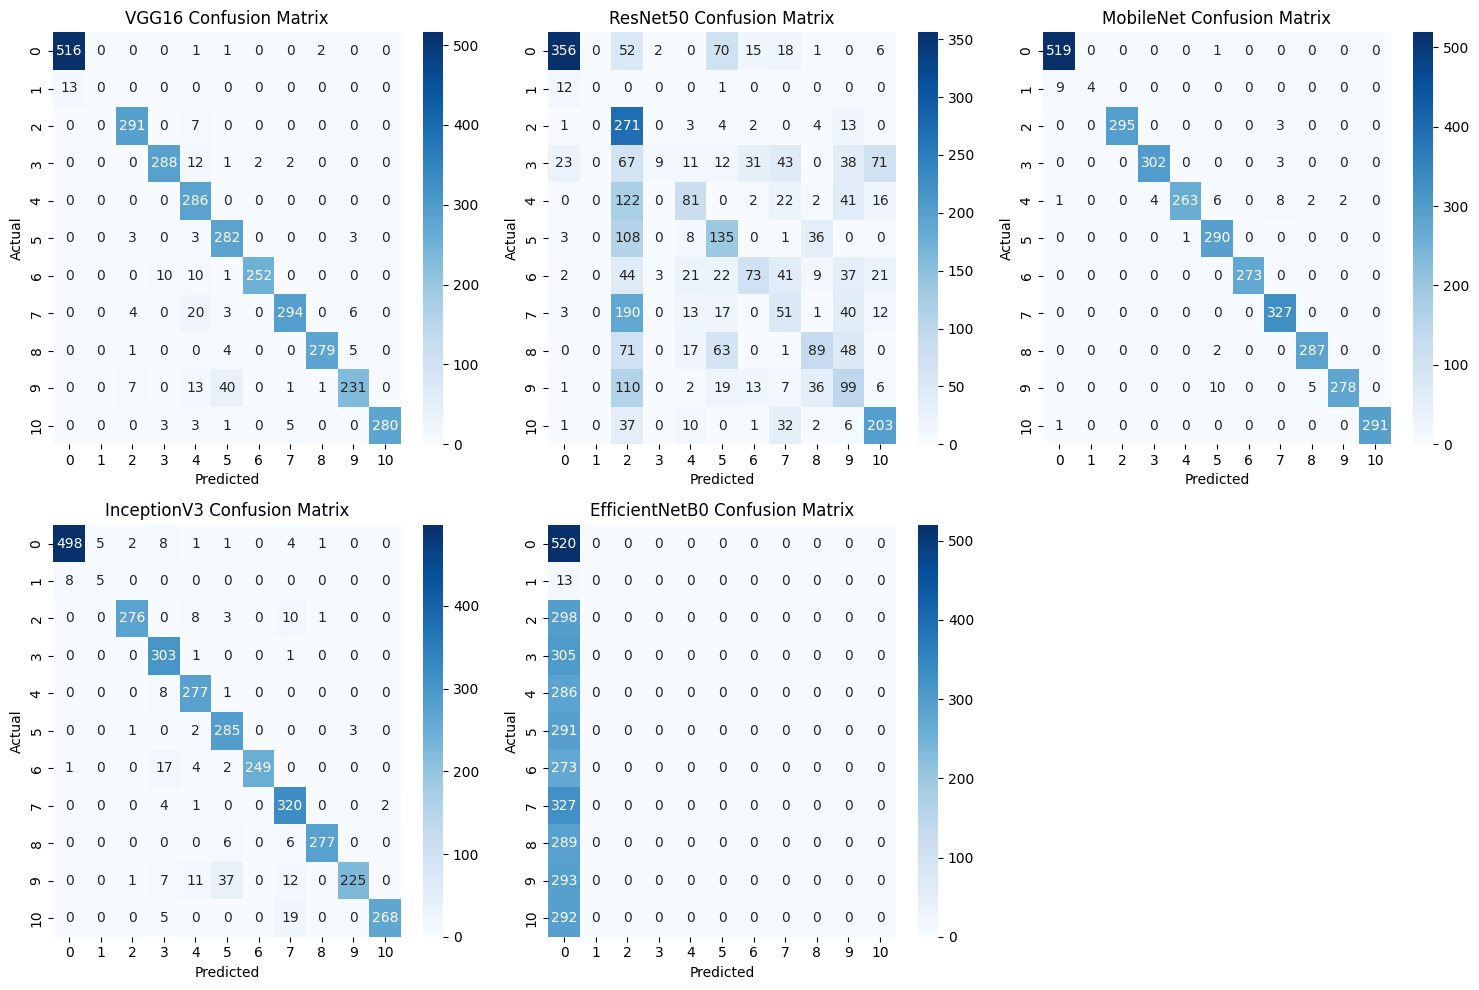


Summary Table:
            Model  Accuracy  Precision    Recall  F1-Score
0           VGG16  0.941010   0.942157  0.941010  0.939293
1        ResNet50  0.428930   0.507872  0.428930  0.412561
2       MobileNet  0.981801   0.982380  0.981801  0.981012
3     InceptionV3  0.935990   0.941659  0.935990  0.935747
4  EfficientNetB0  0.163163   0.026622  0.163163  0.045775


<Figure size 1200x600 with 0 Axes>

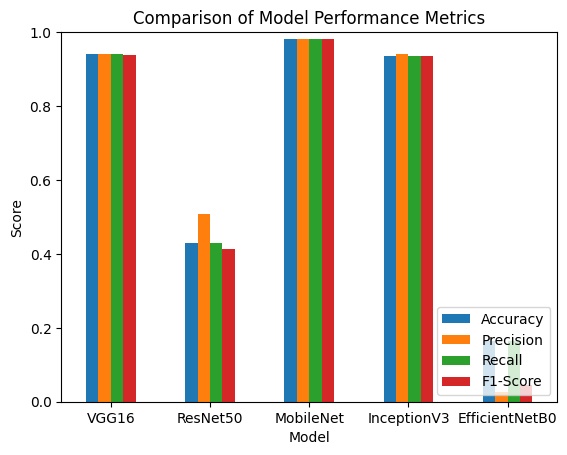

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# -------------------- Test Directory & Batch Size --------------------
test_dir = "/Users/apple/Documents/Projects/image/dataset/data/test"
BATCH_SIZE = 32

metrics = {}  # Store metrics for each model


models_info = {

    "VGG16": {"path": "/Users/apple/Documents/Projects/image/dataset/data/vgg16_trained_model.h5",
              "img_size": (128,128)},
    "ResNet50": {"path": "/Users/apple/Documents/Projects/image/dataset/data/resnet50_trained_model.h5",
                 "img_size": (224,224)},
    "MobileNet": {"path": "/Users/apple/Documents/Projects/image/dataset/data/mobilenet_trained_model.h5",
                  "img_size": (224,224)},
    "InceptionV3": {"path": "/Users/apple/Documents/Projects/image/dataset/data/inceptionv3_trained_model.h5",
                    "img_size": (299,299)},
    "EfficientNetB0": {"path": "/Users/apple/Documents/Projects/image/dataset/data/efficientnetb0_trained_model.h5",
                        "img_size": (224,224)},
}

for model_name, info in models_info.items():
    # Load model first
    model = tf.keras.models.load_model(info["path"])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

    # Get input shape dynamically
    input_h, input_w = model.input_shape[1:3]

    # Create test generator with correct size
    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(input_h, input_w),   # ✅ matches the model
        batch_size=BATCH_SIZE,
        class_mode="categorical",
        shuffle=False
    )

    # Evaluate
    loss, acc = model.evaluate(test_generator)
    print(f"{model_name} Accuracy: {acc:.4f}")


    model = tf.keras.models.load_model(info["path"])
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    
    loss, acc = model.evaluate(test_generator)
    print(f"{model_name} Accuracy: {acc:.4f}")


    # Predict
    y_pred_probs = model.predict(test_generator, steps=len(test_generator))
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = test_generator.classes

    # Compute metrics
    precision = precision_score(y_true, y_pred, average="weighted")
    recall = recall_score(y_true, y_pred, average="weighted")
    f1 = f1_score(y_true, y_pred, average="weighted")
    cm = confusion_matrix(y_true, y_pred)

    # Store metrics
    metrics[model_name] = {
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Confusion Matrix": cm
    }

# -------------------- Display metrics --------------------
for model, scores in metrics.items():
    print(f"\nModel: {model}")
    for metric, value in scores.items():
        if metric == "Confusion Matrix":
            print(f"{metric}:\n{value}")
        else:
            print(f"{metric}: {value:.4f}")

# -------------------- Plot Confusion Matrices --------------------
plt.figure(figsize=(15,10))
rows = 2
cols = 3

for i, (model, scores) in enumerate(metrics.items()):
    plt.subplot(rows, cols, i+1)
    sns.heatmap(scores["Confusion Matrix"], annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# -------------------- Summary Table and Bar Chart --------------------
summary = []
for model_name, scores in metrics.items():
    summary.append({
        "Model": model_name,
        "Accuracy": scores["Accuracy"],
        "Precision": scores["Precision"],
        "Recall": scores["Recall"],
        "F1-Score": scores["F1-Score"]
    })

summary_df = pd.DataFrame(summary)
print("\nSummary Table:")
print(summary_df)

plt.figure(figsize=(12,6))
summary_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-Score"]].plot(kind="bar")
plt.title("Comparison of Model Performance Metrics")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()


In [35]:
# Identify the best model based on Accuracy
best_model = max(metrics.items(), key=lambda x: x[1]["Accuracy"])

# Print the best model in the next cell
print(f"\nBest Model: {best_model[0]}")
print(f"Accuracy: {best_model[1]['Accuracy']:.4f}")
print(f"Precision: {best_model[1]['Precision']:.4f}")
print(f"Recall: {best_model[1]['Recall']:.4f}")
print(f"F1-Score: {best_model[1]['F1-Score']:.4f}")


Best Model: MobileNet
Accuracy: 0.9818
Precision: 0.9824
Recall: 0.9818
F1-Score: 0.9810


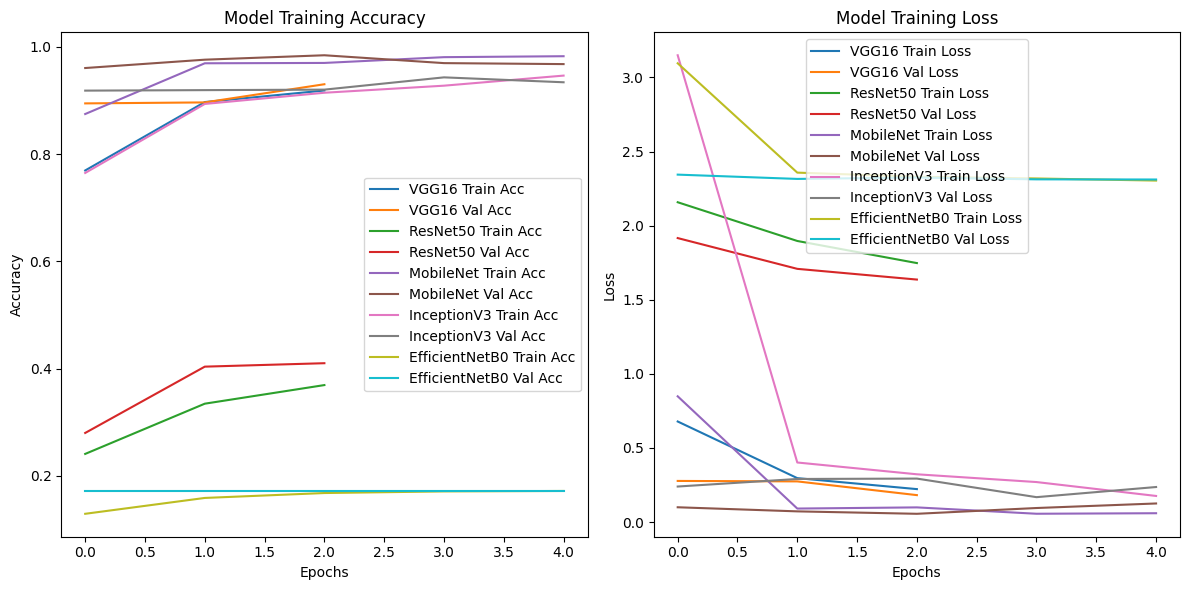

In [ ]:
import pickle
import matplotlib.pyplot as plt

# List of model names and corresponding files
model_files = {
    "VGG16": "/Users/apple/Documents/Projects/image/dataset/data/training_history_vgg16.pkl",
    "ResNet50": "/Users/apple/Documents/Projects/image/dataset/data/training_history_resnet50.pkl",
    "MobileNet": "/Users/apple/Documents/Projects/image/dataset/data/training_history_mobilenet.pkl",
    "InceptionV3": "/Users/apple/Documents/Projects/image/dataset/data/training_history_inceptionv3.pkl",
    "EfficientNetB0": "/Users/apple/Documents/Projects/image/dataset/data/training_history_efficientnetb0.pkl"
}

# Function to load history
def load_history(file):
    with open(file, 'rb') as f:
        return pickle.load(f)

# Plot training history
plt.figure(figsize=(12, 6))
for model, file in model_files.items():
    history = load_history(file)

    # Extract accuracy and loss
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    train_loss = history['loss']
    val_loss = history['val_loss']

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(train_acc, label=f"{model} Train Acc")
    plt.plot(val_acc, label=f"{model} Val Acc")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Model Training Accuracy")
    plt.legend()

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label=f"{model} Train Loss")
    plt.plot(val_loss, label=f"{model} Val Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Model Training Loss")
    plt.legend()

# Show plots
plt.tight_layout()
plt.show()
